## <center><strong>Metode Numerik</strong><br />
<img alt="" src="images/MetNum.png" style="" /></center>

# <center><font color="blue">Optimasi Numerik</font></center>

<h2 id="(C)-Taufik-Sutanto---2019" style="text-align: center;">(C) Taufik Sutanto - 2020</h2>
<h2 id="tau-data-Indonesia-~-https://tau-data.id" style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id/mfds-nm-09/" target="_blank"><span style="color: #0009ff;">https://tau-data.id/mfds-nm-09/</span></a></h2>

# Outline:

*  Minimalisasi Fungsi
* Rasio Emas
* Metode Nelder mead
* Minimalisasi dengan Turunan (gradient Descent)

<h1 id="Pendahuluan-Aplikasi-Turunan">Pendahuluan Aplikasi Turunan</h1>

<ul>
	<li>Statistik (machine learning/data science): Regresi, Klasifikasi, Clustering</li>
	<li>mechanical engineering</li>
	<li>Oceanography, dll</li>
</ul>

<p><img alt="" src="images/intro_optimasi_numerik.png" style="width: 800px; height: 370px;" /></p>


In [1]:
# importing modules
import numpy as np
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

In [2]:
# Fungsi untuk plot
def contourFungsi(X,Y,Z, judul):
    im = imshow(Z,cmap=cm.RdBu, extent=[-3.0,3.0,-3.0,3.0], origin='lower') # drawing the function    
    cset = contour(X,Y,Z,arange(Z.min(),Z.max(),0.1),linewidths=2,cmap=cm.Set2)# adding the Contour lines with labels
    clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    colorbar(im) # adding the colobar on the right
    title(judul); show()

def plotFs3D(X, Y, Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel('x-axis');ax.set_ylabel('y-axis');ax.set_zlabel('z-axis')
    ax.view_init(elev=25, azim=-120)
    fig.colorbar(surf, shrink=0.5, aspect=5);plt.show()

In [3]:
# Fungsi dan domain
def z_func(x,y):
 return (1-(x**2+y**3))*exp(-(x**2+y**2)/2) 

x = y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

In [4]:
%matplotlib qt
# interactive Plot
plotFs3D(X, Y, Z) # Plot Fungsi

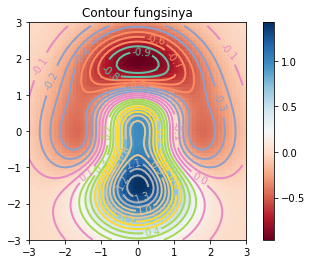

In [5]:
%matplotlib inline 
# Back to inline plot
contourFungsi(X,Y,Z, 'Contour fungsinya') # Contour Fungsi (Biru Maximum, Merah Minimum)

<h1 id="Meminimumkan-Fungsi">Meminimumkan Fungsi</h1>

<p><img alt="" src="images/def_81_82.png" style="width: 734px; height: 313px;" /></p>


<p><img alt="" src="images/Teo_81_82.png" style="width: 726px; height: 195px;" /></p>


<p><img alt="" src="images/Teo_83_84.png" style="width: 727px; height: 312px;" /></p>


<p><img alt="" src="images/Eg_81.png" style="width: 724px; height: 190px;" /></p>


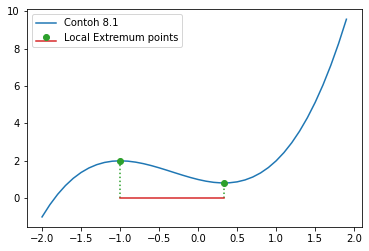

In [6]:
%matplotlib inline 
def f(x):
    #return 3*x**2-2*x+5 
    return x**3+x**2-x+1 

X = arange(-2.0,2.0,0.1)
#X = arange(0,1.0,0.1)
Y = [f(x) for x in X]
plt.plot(X, Y, label = "Contoh 8.1")
plt.stem([-1, 1/3], [f(-1), f(1/3)], label = "Local Extremum points", linefmt='C2:', markerfmt = 'C2o')
plt.legend(); plt.show()

# Diskusi

* Kita bisa mencari extremum points, tapi bagaimana kita tau jika titik itu extremum global/tidak?

<h1 id="Golden-Ratio-(section)-Search">Golden Ratio (section) Search</h1>

<p><img alt="" src="images/Gold_Sect_Search_.png" style="width: 721px; height: 400px;" /></p>


# Ok ... tapi apanya yang golden?

* [video controls src="images/Multiplicative example of the golden ratio.mp4" />

In [7]:
(np.sqrt(5)+1)/2

1.618033988749895

# Golden Ratio, Fibonacci, dan Ciptaan Ilahi

* [ video controls src="images/FiboGolden.mkv" />

<p><img alt="" src="images/eg_Gold_Sect_Search_.png" style="width: 716px; height: 400px;" /></p>


<p><img alt="" src="images/Eg_82._A.png" style="width: 718px; height: 574px;" /></p>


<h1 id="Algoritma-Golden-Search">Algoritma Golden Search</h1>

<p><img alt="" src="images/Gold_Sect_Search_Alg.png" /></p>


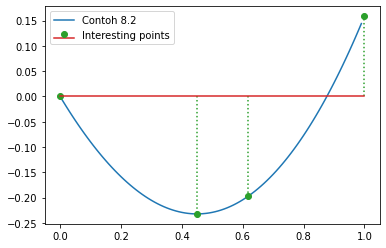

In [8]:
def f(x):
    #return 3*x**2+2*x+5
    #return x+np.cos(x)
    return x**2 - np.sin(x)
X = arange(0.0,1.0,0.01)
Y = [f(x) for x in X]
plt.plot(X, Y, label = "Contoh 8.2")
xPts = [0, 0.450, 0.618, 1]
yPts = [f(x) for x in xPts]
plt.stem(xPts, yPts, label = "Interesting points", linefmt='C2:', markerfmt = 'C2o')
plt.legend(); plt.show()

In [9]:
# Simple version from Wikipedia
def gss(a, b, tol=1e-6):
    gr = (np.sqrt(5) + 1) / 2 # Gold Ratio
    c = b - (b - a) / gr
    d = a + (b - a) / gr 
    output = [(a,b,c,d)]
    while abs(c - d) > tol:        
        if f(c) < f(d):
            b = d
        else:
            a = c
        output.append((a,b,c,d))
        c = b - (b - a) / gr
        d = a + (b - a) / gr
    return output

In [10]:
# Versi Mathews 
def GS(a,b,n): # n = jumlah iterasi    
    r = (np.sqrt(5)-1)/2
    c = a + (1-r)*(b-a)
    d = a + r*(b-a)
    output = [(a,b,c,d)]
    for i in range(n): # or abs(c - d) > tol
        if f(d)<f(c):
            a=c
        else:
            b=d
        c = a + (1-r)*(b-a)
        d = a + r*(b-a)    
        output.append((a,b,c,d))
    return output

In [11]:
A, B = 0.0, 1.0
output = gss(A,B) # versi wikipedia
print('iter, \ta,      \tc,      \td,      \tb')
for i,(a,b,c,d) in enumerate(output):
    print(i, end = ', \t')
    print('{}, \t{}, \t{}, \t{}'.format(a,c,d,b))

iter, 	a,      	c,      	d,      	b
0, 	0.0, 	0.3819660112501052, 	0.6180339887498948, 	1.0
1, 	0.0, 	0.3819660112501052, 	0.6180339887498948, 	0.6180339887498948
2, 	0.2360679774997897, 	0.2360679774997897, 	0.3819660112501051, 	0.6180339887498948
3, 	0.3819660112501051, 	0.3819660112501051, 	0.4721359549995794, 	0.6180339887498948
4, 	0.3819660112501051, 	0.47213595499957933, 	0.5278640450004206, 	0.5278640450004206
5, 	0.3819660112501051, 	0.4376941012509463, 	0.4721359549995794, 	0.4721359549995794
6, 	0.41640786499873816, 	0.41640786499873816, 	0.4376941012509463, 	0.4721359549995794
7, 	0.4376941012509464, 	0.4376941012509464, 	0.4508497187473712, 	0.4721359549995794
8, 	0.4376941012509464, 	0.45084971874737123, 	0.45898033750315453, 	0.45898033750315453
9, 	0.44582472000672974, 	0.44582472000672974, 	0.4508497187473712, 	0.45898033750315453
10, 	0.44582472000672974, 	0.45084971874737123, 	0.45395533876251304, 	0.45395533876251304
11, 	0.4489303400218716, 	0.4489303400218716, 	0.

In [12]:
a = 0.0
b = 0.23606797749978967
f((a+b)/2)

-0.1038280817430638

In [13]:
output = GS(A,B,24) # versi Matthews
print('iter, \ta,      \tc,      \td,      \tb')
for i,(a,b,c,d) in enumerate(output):
    print(i, end = ', \t')
    print('{}, \t{}, \t{}, \t{}'.format(a,c,d,b))

iter, 	a,      	c,      	d,      	b
0, 	0.0, 	0.3819660112501051, 	0.6180339887498949, 	1.0
1, 	0.0, 	0.2360679774997897, 	0.3819660112501052, 	0.6180339887498949
2, 	0.2360679774997897, 	0.38196601125010515, 	0.47213595499957944, 	0.6180339887498949
3, 	0.38196601125010515, 	0.4721359549995794, 	0.5278640450004206, 	0.6180339887498949
4, 	0.38196601125010515, 	0.4376941012509464, 	0.4721359549995794, 	0.5278640450004206
5, 	0.38196601125010515, 	0.41640786499873816, 	0.4376941012509464, 	0.4721359549995794
6, 	0.41640786499873816, 	0.4376941012509464, 	0.45084971874737123, 	0.4721359549995794
7, 	0.4376941012509464, 	0.45084971874737123, 	0.45898033750315453, 	0.4721359549995794
8, 	0.4376941012509464, 	0.44582472000672974, 	0.4508497187473712, 	0.45898033750315453
9, 	0.44582472000672974, 	0.45084971874737123, 	0.45395533876251304, 	0.45898033750315453
10, 	0.44582472000672974, 	0.4489303400218716, 	0.4508497187473712, 	0.45395533876251304
11, 	0.4489303400218716, 	0.4508497187473712

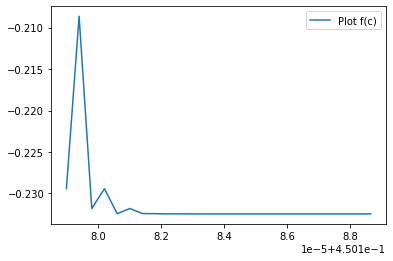

-0.23246557515815913

In [14]:
Fc = [f((a+b)/2) for a,b,_,_ in output]
plt.plot(np.linspace(a,b,len(Fc)), Fc, label = "Plot f(c)")
plt.legend(); plt.show()
Fc[-1]

<h3 id="Tentukan-f(optimal)-dan-x-optimal-setelah-3-iterasi-(a+b)/2-yang-ke-3">Tentukan f(optimal) dan x optimal setelah 3 iterasi (c+d)/2 yang ke-3</h3>

## $$f(x) = 7x^2-x+3;\quad [0,2]$$


In [15]:
def f(x):
    return 7*x**2-x+3+np.cos(x)**2
A, B = 0, 2
output = GS(A,B,4)
print('iter, \ta,      \tc,      \td,      \tb')
for i,(a,b,c,d) in enumerate(output):
    print(i, end = ', \t')
    print('{}, \t{}, \t{}, \t{}'.format(a,c,d,b))
0.763/2

iter, 	a,      	c,      	d,      	b
0, 	0, 	0.7639320225002102, 	1.2360679774997898, 	2
1, 	0, 	0.4721359549995794, 	0.7639320225002104, 	1.2360679774997898
2, 	0, 	0.2917960675006309, 	0.4721359549995795, 	0.7639320225002104
3, 	0, 	0.1803398874989485, 	0.29179606750063103, 	0.4721359549995795
4, 	0, 	0.11145618000168246, 	0.18033988749894858, 	0.29179606750063103


0.3815

## Extreme Values of f(x,y) ~ Multivariate Function

<p><img alt="" src="images/def_83.png" style="width: 553px; height: 252px;" /></p>


<p><img alt="" src="images/Teo_85.png" style="width: 552px; height: 239px;" /></p>


<h1 id="Metode-Nelder-Mead">Metode Nelder-Mead</h1>

1. Mulai dari sembarang segitiga $(x_k, y_k)$, k=1, 2, 3
2. Hitung $z_k = f(x_k, y_k)$, k=1, 2, 3
3. urutkan $z_k$ (dan urutkan ulang indeks *k*) sedemikian sehingga $z_i \leq z_2 \leq z_3$
4. Namakan $B = z_1, G = z_2, W = z_3$
5. Hitung (MidPoint of "goodSide") = *$M=\frac{B+G}{2}$*
6. Hitung titik : *$ R = 2M - W $*
7. Hitung titik : *E = 2R-M* (alternatif R)
8. Hitung $C_1 = \frac{W+M}{2}$ dan $C_2 = \frac{M+R}{2}$ (kandidat segitiga BGC)
9. Secara terurut kandidat terbaik pengganti W adalah (E, R, C2, C1) 
10. Dengan syarat kandidat tersebut < W -- Lihat Gambar
11. Iterasikan dengan BGW yang baru (setelah diurutkan lagi), hingga |B-G|<toleransi
<p><img alt="" src="images/Nelder-Mead_3angles_.png"/></p>



# Animasinya

* [video controls src="images/NelderMeadAnimation.mp4" /> ]

<p><img alt="" src="images/Eg_84.png" style="width: 438px; height: 358px;" /></p>


## Latihan ... = Contoh 8.4
$f(x,y)=x^2-4x+y^2-y-xy$
* v1=(0,0), v2=(1.2, 0), v3=(0.0,0.8)


In [16]:
def F(v):
    x, y = v[0], v[1]
    return x**2-4*x+y**2-y-x*y

v1, v2, v3 = (0,0), (1.2,0), (0.0,0.8)
v1 = np.array(v1); v2 = np.array(v2); v3 = np.array(v3)

print(F(v1), F(v2), F(v3))
B, G, W = v3, v1, v2
M = (B+G)/2
R = 2*M-W
E = 2*R-M
print(F(E),F(B),F(G))

B, G, W = E, B, v2
M = (B+G)/2
R = 2*M-W
E = 2*R-M

print(F(E),F(B),F(G))
B

0 -3.36 -0.15999999999999992
18.48 -0.15999999999999992 0
83.99999999999999 18.48 -0.15999999999999992


array([-2.4,  1.2])

# Minimization using Derivative

* Konsepnya adalah Newton (Secant) pada permasalahan mencari akar f'(x) = 0
* Bracketing di Mathhews (hal 410) ... HHhmmm... do you see why we're not discussing it further?
* .
* $\min -2x^4 + 3x-7$  jika $X_0=1$ hitung $x_3^*$ menggunakan metode Newton.

In [17]:
def F(x):
    return -2*x**4 + 3*x - 7
def g(x):
    return -8*x**3 + 3
def gg(x):
    return -24*x**2

# Newton (X3, xo=1)
xo =1
x1 = xo - g(xo)/gg(xo)
x2 = x1 - g(x1)/gg(x1)
x3 = x2 - g(x2)/gg(x2)
x3

0.7211757921789095

<p><img alt="" src="images/Gradient_Descent.png" style="width: 436px; height: 249px;" /></p>


# End of Module
<hr />
